# Mount and Imports

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/My Drive/Cardiac Project/Registration_phase/based on doc2/

/content/gdrive/.shortcut-targets-by-id/1T4XU2DwFBpucge5DbMQ0wVZaRLkXQ564/Cardiac Project/Registration_phase/based on doc2


In [8]:
!pip install -q pydicom
!pip install tqdm -q
!pip install SimpleITK -q

In [9]:
import os
import glob
from tqdm import tqdm
import pydicom
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import json

# imports from file
from scripts.phase3 import *
from scripts.phase4 import *
from scripts.phase5 import *
from scripts.phase6 import *

# Phase 1

Reading: 3it [00:00, 784.28it/s]


./dataset/ok1,2/1595517/3/img0021
./dataset/ok1,2/1595517/3/img0007
./dataset/ok1,2/1595517/3/img0007


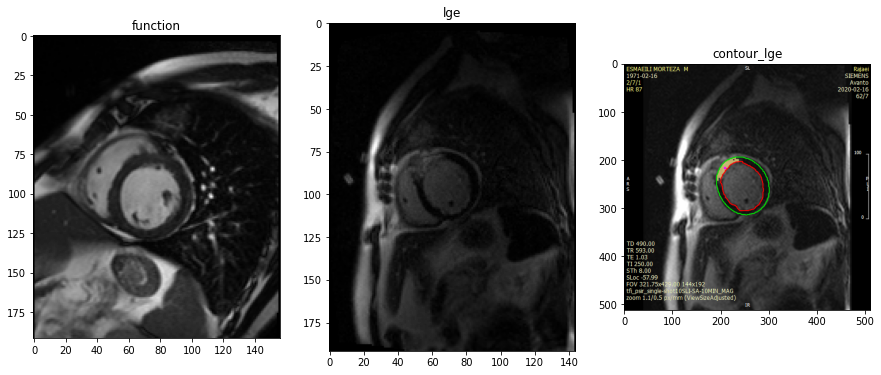

In [24]:
get_phase1_data('ok1,2', 1595517, 3)

# Phase 3

Reading: 7it [00:00, 1115.08it/s]


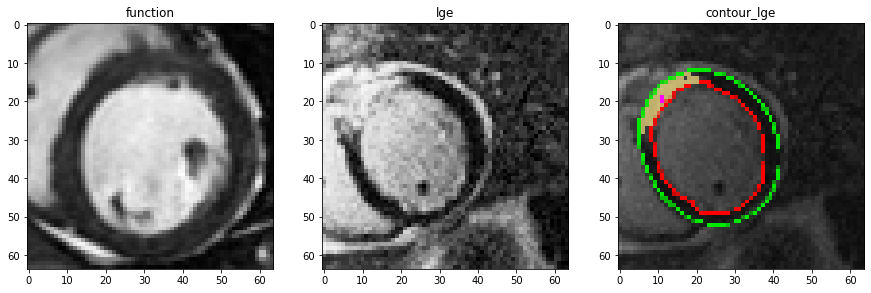

In [30]:
get_phase3_data('ok1,2', 1595517, 3)

# Phase 4

Reading: 7it [00:00, 1098.81it/s]
/content/gdrive/.shortcut-targets-by-id/1T4XU2DwFBpucge5DbMQ0wVZaRLkXQ564/Cardiac Project/Registration_phase/based on doc2/scripts/phase4.py:217: RuntimeWarning: overflow encountered in ubyte_scalars
  if color == 'green' and (G - R) > 100 and (G - B) > 100:
/content/gdrive/.shortcut-targets-by-id/1T4XU2DwFBpucge5DbMQ0wVZaRLkXQ564/Cardiac Project/Registration_phase/based on doc2/scripts/phase4.py:223: RuntimeWarning: overflow encountered in ubyte_scalars
  if color == 'yellow' and abs(R - G) < 50 and (R - B) > 50 and (G - B) > 50:


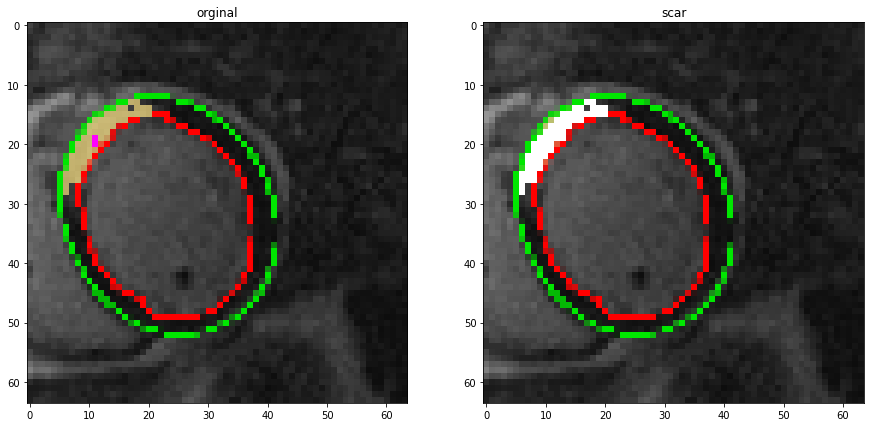

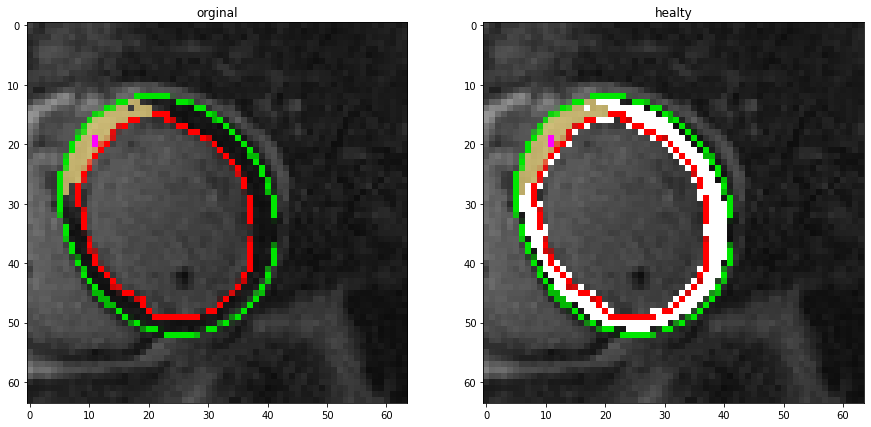

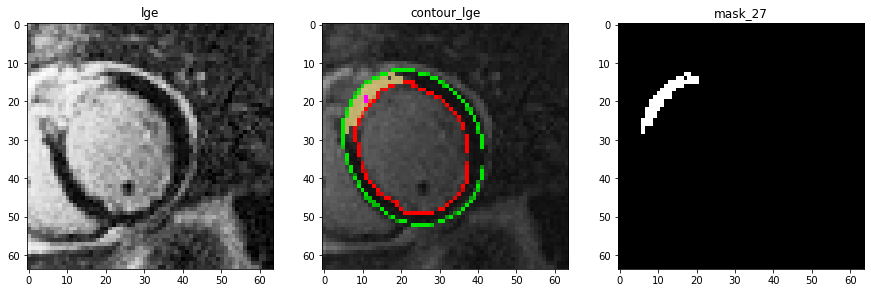

In [38]:
get_phase4_data('ok1,2', 1595517, 3)

# Phase 5

Reading: 7it [00:00, 1192.19it/s]


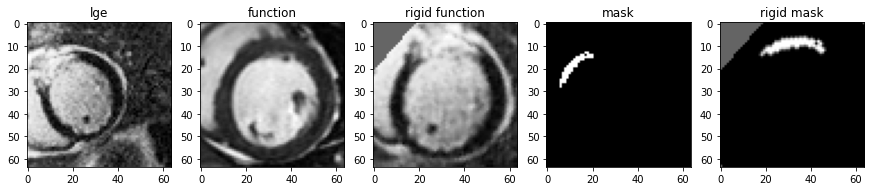

In [44]:
get_phase5_data('ok1,2', 1595517, 3)

# Phase 6

Reading: 7it [00:00, 3428.32it/s]


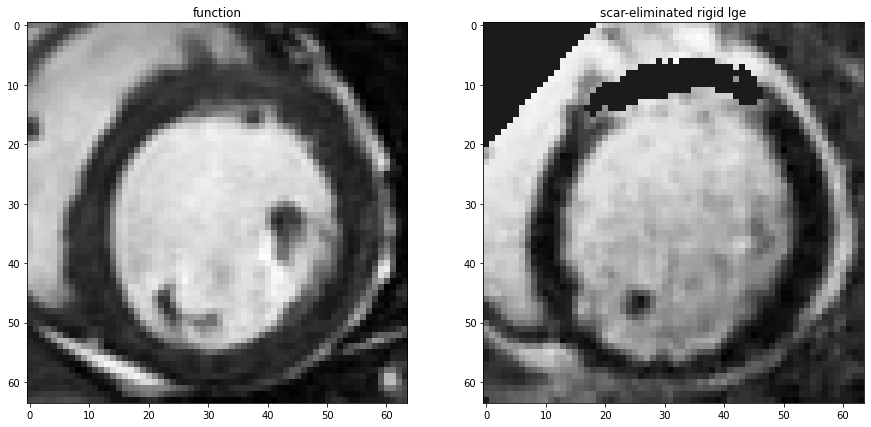

In [48]:
get_phase6_data('ok1,2', 1595517, 3)

# Problems

1) still not getting good results on unsimilar function-lge pairs.

2) data loss in the size-padding phase because of unsimilar lge and c_lge pairs (about 14 out of 65).

# Functions

In [25]:
def get_phase1_data(category, patient_num, folder_num):
  root = './dataset/' + category + '/' + str(patient_num) + '/' + str(folder_num)
  for path in tqdm(glob.iglob(root + '**/*.png' , recursive=True) , desc = "Reading"):
    if "results" in path:
      continue
    if "unknown" in path:
      c_lge_path = path
    elif path.split('-')[0].split('/')[-1] == "img0021":
      cine_path = path
    else:
      lge_path = path
      
  lge = cv2.imread(lge_path , cv2.IMREAD_GRAYSCALE)
  cine = cv2.imread(cine_path , cv2.IMREAD_GRAYSCALE)
  c_lge = cv2.cvtColor(cv2.imread(c_lge_path), cv2.COLOR_RGB2BGR)
  
  fig , (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
  ax1.imshow(cine, cmap='gray')
  ax2.imshow(lge, cmap='gray')
  ax3.imshow(c_lge, cmap='gray')
  ax1.set_title("function")
  ax2.set_title("lge")
  ax3.set_title("contour_lge")

In [29]:
def get_phase3_data(category, patient_num, folder_num):
  root = './dataset/' + category + '/' + str(patient_num) + '/' + str(folder_num) + '/results/'
  for path in tqdm(glob.iglob(root + '**/*.png' , recursive=True) , desc = "Reading"):
    if "unknown" in path:
      c_lge_path = path
    elif path.split('-')[0].split('/')[-1] == "img0021":
      cine_path = path
    elif path.split('-')[0].split('/')[-1] == "img0007":
      lge_path = path
      
  lge = cv2.imread(lge_path , cv2.IMREAD_GRAYSCALE)
  cine = cv2.imread(cine_path , cv2.IMREAD_GRAYSCALE)
  c_lge = cv2.cvtColor(cv2.imread(c_lge_path), cv2.COLOR_RGB2BGR)
  
  fig , (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
  ax1.imshow(cine, cmap='gray')
  ax2.imshow(lge, cmap='gray')
  ax3.imshow(c_lge, cmap='gray')
  ax1.set_title("function")
  ax2.set_title("lge")
  ax3.set_title("contour_lge")

In [37]:
def get_phase4_data(category, patient_num, folder_num):
  root = './dataset/' + category + '/' + str(patient_num) + '/' + str(folder_num) + '/results/'
  for path in tqdm(glob.iglob(root + '**/*.png' , recursive=True) , desc = "Reading"):
    if "unknown" in path:
      c_lge_path = path
    elif path.split('-')[0].split('/')[-1] == "img0021":
      cine_path = path
    elif path.split('-')[0].split('/')[-1] == "img0007":
      lge_path = path
    elif "mask" in path and "rigid" not in path:
      mask_path = path

  intensity = mask_path.split('.')[-2].split('_')[-1]
      
  lge = cv2.imread(lge_path , cv2.IMREAD_GRAYSCALE)
  mask = cv2.imread(mask_path , cv2.IMREAD_GRAYSCALE)
  c_lge = cv2.cvtColor(cv2.imread(c_lge_path), cv2.COLOR_RGB2BGR)

  _ = get_healthy(c_lge, scar_color='yellow', show=True)
  
  fig , (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
  ax1.imshow(lge, cmap='gray')
  ax2.imshow(c_lge, cmap='gray')
  ax3.imshow(mask, cmap='gray')
  ax1.set_title("lge")
  ax2.set_title("contour_lge")
  ax3.set_title("mask_" + str(intensity))

In [43]:
def get_phase5_data(category, patient_num, folder_num):
  root = './dataset/' + category + '/' + str(patient_num) + '/' + str(folder_num) + '/results/'
  for path in tqdm(glob.iglob(root + '**/*.png' , recursive=True) , desc = "Reading"):
    if "unknown" in path:
      c_lge_path = path
    elif path.split('-')[0].split('/')[-1] == "img0021":
      cine_path = path
    elif path.split('-')[0].split('/')[-1] == "img0007":
      lge_path = path
    elif "rigid_mask" in path:
      rigid_mask_path = path
    elif "rigid_lge" in path and "scar" not in path:
      rigid_lge_path = path
    elif "mask" in path and "rigid" not in path:
      mask_path = path

  intensity = mask_path.split('.')[-2].split('_')[-1]
      
  lge = cv2.imread(lge_path , cv2.IMREAD_GRAYSCALE)
  cine = cv2.imread(cine_path , cv2.IMREAD_GRAYSCALE)
  mask = cv2.imread(mask_path , cv2.IMREAD_GRAYSCALE)
  rigid_mask = cv2.imread(rigid_mask_path , cv2.IMREAD_GRAYSCALE)
  rigid_lge = cv2.imread(rigid_lge_path , cv2.IMREAD_GRAYSCALE)
  
  fig , (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 15))
  ax1.imshow(lge, cmap='gray')
  ax2.imshow(cine, cmap='gray')
  ax3.imshow(rigid_lge, cmap='gray')
  ax4.imshow(mask, cmap='gray')
  ax5.imshow(rigid_mask, cmap='gray')
  ax1.set_title("lge")
  ax2.set_title("function")  
  ax3.set_title("rigid function")
  ax4.set_title("mask")
  ax5.set_title("rigid mask")

In [47]:
def get_phase6_data(category, patient_num, folder_num):
  root = './dataset/' + category + '/' + str(patient_num) + '/' + str(folder_num) + '/results/'
  for path in tqdm(glob.iglob(root + '**/*.png' , recursive=True) , desc = "Reading"):
    if "unknown" in path:
      c_lge_path = path
    elif path.split('-')[0].split('/')[-1] == "img0021":
      cine_path = path
    elif path.split('-')[0].split('/')[-1] == "img0007":
      lge_path = path
    elif "rigid_mask" in path:
      rigid_mask_path = path
    elif "rigid_lge" in path and "scar" not in path:
      rigid_lge_path = path
    elif "mask" in path and "rigid" not in path:
      mask_path = path
    elif "scar_eliminated_rigid_lge" in path:
      scar_eliminated_path = path
      
  lge = cv2.imread(lge_path , cv2.IMREAD_GRAYSCALE)
  c_lge = cv2.imread(c_lge_path , cv2.IMREAD_GRAYSCALE)
  cine = cv2.imread(cine_path , cv2.IMREAD_GRAYSCALE)
  mask = cv2.imread(mask_path , cv2.IMREAD_GRAYSCALE)
  rigid_mask = cv2.imread(rigid_mask_path , cv2.IMREAD_GRAYSCALE)
  rigid_lge = cv2.imread(rigid_lge_path , cv2.IMREAD_GRAYSCALE)
  scar_eliminated = cv2.imread(scar_eliminated_path , cv2.IMREAD_GRAYSCALE)
  
  
  fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
  ax1.imshow(cine, cmap='gray')
  ax2.imshow(scar_eliminated, cmap='gray')
  ax1.set_title("function")
  ax2.set_title("scar-eliminated rigid lge")
  

In [ ]:
def get_segment_cordinates(image, seg_color, show=True):
  cordinates = []
  img = image.copy()
  segment_pixel_nb = 0
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      R, G, B = img[i][j]
      in_segment = check_color(seg_color, R, G, B) 
      if seg_color == 'yellow' or seg_color == 'blue':
        in_segment = in_segment or check_color('pink', R, G, B)
      if in_segment:
          img[i][j] = [255, 255, 255]
          segment_pixel_nb += 1
          cordinates.append((i, j))
  if show:
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
    ax1.imshow(image, cmap='gray')
    ax2.imshow(img, cmap='gray')
    if seg_color == 'yellow':
      ax1.set_title("orginal")
      ax2.set_title("scar")
  return cordinates

def check_color(color, R, G, B):
  if color == 'green' and (G - R) > 100 and (G - B) > 100:
    return True
  if color == 'red' and R>B and R > G + 100 and R > B + 100:
    return True
  if (color == 'blue') and (B>G)  and (B>R) and (R>100) and (B>100) and (G>100):
    return True  
  if color == 'yellow' and abs(R - G) < 50 and (R - B) > 50 and (G - B) > 50:
    return True
  if color == 'pink' and abs(R - B) < 50 and R > 200 and B > 200 and G < 60:
    return True
  return False

In [ ]:
def is_in(x, y, cordinates, treshold=0):
  TR, TL, BR, BL = get_surrounding(x, y, cordinates)
  if len(TR) > treshold and len(TL) > treshold and len(BR) > treshold and len(BL) > treshold:
    return True
  return False

def get_surrounding(x, y, cordinates):
  top_right = []
  top_left = []
  bottom_right = []
  bottom_left = []
  for i, j in cordinates:
    if x-i > 0 and y-j < 0:
      top_right.append((i, j))
    elif x-i > 0 and y-j > 0:
      top_left.append((i, j))
    elif x-i < 0 and y-j < 0:
      bottom_right.append((i, j))
    elif x-i < 0 and y-j > 0:
      bottom_left.append((i, j))
  return top_right, top_left, bottom_right, bottom_left

In [ ]:
def get_pixels_in_contour(image, contour_color, show=True):
  img = image.copy()
  contour_cords = get_segment_cordinates(img, contour_color, show=False)
  sorted_by_i = sorted(contour_cords, key=lambda x: x[0])
  min_i = sorted_by_i[0][0]
  max_i = sorted_by_i[-1][0]
  sorted_by_j = sorted(contour_cords, key=lambda x: x[1])
  min_j = sorted_by_j[0][1]
  max_j = sorted_by_j[-1][1]
  inside_contour_cords = []
  for i in range(min_i, max_i + 1):
    for j in range(min_j, max_j + 1):
      if is_in(i, j, contour_cords):
        inside_contour_cords.append((i, j))
        img[i][j] = [0, 0, 255]
  if show:
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
    ax1.imshow(image , cmap='gray')
    ax1.set_title("orginal")
    ax2.imshow(img , cmap='gray')
    ax2.set_title("inside")
  return inside_contour_cords

In [ ]:
def get_pixels_between_contours(image, show=True):
  img = image.copy()
  green_contour_cords = get_segment_cordinates(img, 'green', show=False)
  red_contour_cords = get_segment_cordinates(img, 'red', show=False)
  sorted_by_i = sorted(green_contour_cords, key=lambda x: x[0])
  min_i = sorted_by_i[0][0]
  max_i = sorted_by_i[-1][0]
  sorted_by_j = sorted(green_contour_cords, key=lambda x: x[1])
  min_j = sorted_by_j[0][1]
  max_j = sorted_by_j[-1][1]
  between_contours_cords = []
  for i in range(min_i, max_i + 1):
    for j in range(min_j, max_j + 1):
      if is_in(i, j, green_contour_cords) and not is_in(i, j, red_contour_cords):
        if (i, j) not in red_contour_cords:
          between_contours_cords.append((i, j))
          img[i][j] = [255, 255, 255]
  if show:
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
    ax1.imshow(image , cmap='gray')
    ax1.set_title("orginal")
    ax2.imshow(img , cmap='gray')
    ax2.set_title("between")
  return between_contours_cords

In [34]:
def get_healthy(image, scar_color='yellow', show=True):
  img = image.copy()
  between = get_pixels_between_contours(img, show=False)
  scar = get_segment_cordinates(img, scar_color, show=show)
  healthy = []
  for cord in between:
    if cord not in scar:
      healthy.append(cord)
      i, j = cord
      img[i][j] = [255, 255, 255]
  if show:
    fig , (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
    ax1.imshow(image , cmap='gray')
    ax1.set_title("orginal")
    ax2.imshow(img , cmap='gray')
    ax2.set_title("healty")
  return healthy

In [ ]:
def get_scar_binary_mask(c_lge, scar_color='yellow'):
  if c_lge.shape != (64, 64, 3):
    print('image shape must be 64*64!!')
    return
  mask = np.zeros((64, 64, 3), dtype=np.uint8)
  scar = get_segment_cordinates(c_lge, scar_color, show=False)
  for i, j in scar:
    mask[i][j] = [255, 255, 255]
  return mask

def get_substitude_intensity(lge, c_lge, mode, med=0.5, scar_color='yellow'):
  if mode == 'avg_between':
    return get_substitude_intensity_avg_between(lge, c_lge, scar_color)
  if mode == 'avg_inside':
    return get_substitude_intensity_avg_inside(lge, c_lge, scar_color)
  if mode == 'med_between':
    return get_substitude_intensity_med_between(lge, c_lge, med, scar_color)

def get_substitude_intensity_avg_between(lge, c_lge, scar_color='yellow'):
  healthy = get_healthy(c_lge, scar_color=scar_color, show=False)
  sub_intensity = 0
  for i, j in healthy:
    sub_intensity += lge[i][j] 
  sub_intensity /= len(healthy)
  return int(sub_intensity)

def get_substitude_intensity_med_between(lge, c_lge, med, scar_color='yellow'):
  healthy = get_healthy(c_lge, scar_color=scar_color, show=False)
  intensities = []
  for i, j in healthy:
    intensities.append(lge[i][j])
  intensities = sorted(intensities, key=lambda x: x)
  return intensities[int((len(intensities) - 1) * med)]

def get_substitude_intensity_avg_inside(lge, c_lge, scar_color='yellow'):
  inside_red_contour = get_pixels_in_contour(c_lge, 'red', show=False)
  substitude_intensity = 0
  for i, j in inside_red_contour:
    substitude_intensity += lge[i][j] 
  substitude_intensity /= len(inside_red_contour)
  return int(substitude_intensity)